#  Hands-on Python

## Exercício I (numpy, pandas, matplotlib)

Você deverá resolver o seguinte notebook: [numpy-pandas-training](https://colab.research.google.com/drive/1Nrf4IXESsW6fx2L3W6tZfe51WeAYCx8u). Nesse notebook, abaixo de cada célula de código está o resultado esperado.




## Exercício Extra 1 (implementação) - Obrigatório para a célula de otimização

Implementar o Algoritmo do Gradiente (referência: http://www.mat.ufmg.br/~taka/Download/OTEV-Vol2.pdf, página 63) na otimização do seguinte problema:

$$\min_\bar{x} f(x_1,x_2) = (x_1-1)^2 + 2x_2^2\\
-10 \leq x_1, x_2 \leq 10$$

Onde o ótimo é $x^* = [1, 0]^T$.

Requisitos da implementação:

- Inicialmente, plotar as curvas de nível da função objetivo;

- Plotar o valor de $f(\bar{x})$ ao longo das iterações;

- Ao final, marcar o ponto $\bar{x}^*$ no gráfico inicial;

- Ter uma função que retorne o valor de $f(\bar{x})$ e de $\nabla f(\bar{x})$ para um dado $\bar{x}$;

- Número máximo de iterações: 100;

- Precisão $\epsilon = 10^{-2}$;

- Critérios de parada:
  - Número máximo de iterações
  - $ ||\nabla f(\bar{x})|| \leq \epsilon$
  
- Ponto inicial: $\bar{x}_0 = [10, 10]^T$

Dicas:

- $ \nabla f(\bar{x}_k) = \begin{bmatrix} 
\frac{\partial f(x)}{\partial x_1} \\
\frac{\partial f(x)}{\partial x_2} \\
\end{bmatrix}$;

- $\bar{d}_k = -\frac{\nabla f(\bar{x}_k)}{||\nabla f(\bar{x}_k)||}$;

- $\alpha_k = \frac{d_1 - x_1d_1 - 2x_2d_2}{d_1^2+2d_2^2}$.






### Bibliotecas utilizadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Função f(x1, x2)

In [2]:
def f_x1_x2(X):
    
    """
    Função retorna o valor de f(x1, x2), dado vetor X composto por x1 e x2.
    """
    
    f = (X[0] - 1) ** 2 + 2 * (X[1] ** 2)
    
    return f
    

### Curvas de nível para a função f(x1, x2)

Text(0.5, 1.0, 'f(x1, x2)')

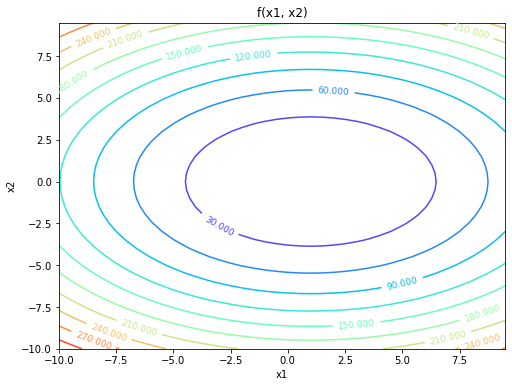

In [3]:
delta = 0.5
x1 = np.arange(-10.0, 10.0, delta)
x2 = np.arange(-10.0, 10.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = f_x1_x2([X1, X2])


fig, ax = plt.subplots(figsize=(8,6))
CS = ax.contour(X1, X2, Z, 10, cmap=plt.get_cmap('rainbow'))
ax.clabel(CS, inline=1, fontsize=9)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.set_title('f(x1, x2)')


### Função gradiente

In [4]:
def gradiente(X):
    
    """
    Função retorna o vetor gradiente 'g' de f(x1,x2), dado vetor X composto por x1 e x2,
    assim como o módulo fo gradiente.
    
    O módulo do gradiente é calculado pela raiz quadrada da soma dos quadrados.
    
    O vetor gradiente 'g' é obtido a partir da função gradiente.
    
    A função gradiente é obtida pela derivada de f(x1, x2) em função de x1 e x2.
    """
    
    g = np.array([2* (X[0] - 1), 4 * X[1]])
    
    modulo_gradiente = np.sqrt(g[0] ** 2 + g[1] ** 2)

    return g, modulo_gradiente

### Função direção

In [5]:
def direcao(X):
    
    """
    Função retorna o vetor direção 'D', composto por d1 e d2. Esse vetor é obtido a partir da equação 
    apresentada anteriormente: vetor gradiente descendente dividido pelo módulo do gradiente.
    

    O vetor gradiente descendente nada mais é senão o oposto do vetor gradiente 'g'.
    """
    
    g, modulo_gradiente = gradiente(X)
    
    D = np.array([-g[0], -g[1]])/modulo_gradiente
    
    return D

In [6]:
dire = direcao([10, 10])
dire

array([-0.41036468, -0.91192151])

### Função alfa

In [7]:
def alfa(X):
    
    """
    Função retorna alfa, obtido pela equação dada das dicas.
    
    'D' é o vetor direção composto por d1 e d2.
    
    'X' é o vetor de entradas composto por x1 e x2.
    """

    D = direcao(X)

    a = (D[0] - X[0]*D[0] - 2*X[1]*D[1])/(D[0]**2 + 2*D[1]**2)

    return a

### Função obter X

In [8]:
def obter_X(X):
    
    max_it = 0
    f_X = []
    precisao = 0.01

    while max_it < 100:

        f_X.append(f_x1_x2(X))
        g, modulo_gradiente = gradiente(X)
        
        
        D = direcao(X)
        
        a = alfa(X)
        
        X[0] = X[0] + a * D[0]
        X[1] = X[1] + a * D[1]
        
        if modulo_gradiente <= precisao:
            return X, f_X

        max_it += 1
    
    return X, f_X
    

#### Obtém o vetor X[x1, x2] e o histórico de f(x1, x2) ao longo das iterações

In [9]:
x, f = obter_X([10, 10])

### Função f(x1,x2) ao longo das iterações

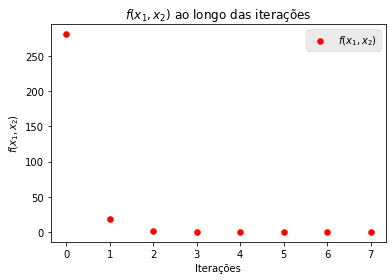

In [10]:
# Lista com número de iterações para obter f(x1, x2)
iteracoes = list(range(len(f)))

plt.figure()
plt.title('$f(x_1,x_2)$ ao longo das iterações')

plt.style.use('ggplot')
plt.xlabel('Iterações')
plt.ylabel('$f(x_1,x_2)$')
plt.scatter(iteracoes, f, label='$f(x_1,x_2)$', color='red')
plt.legend()
plt.show()


### Curva de nível com ponto mínimo encontrado

Text(0.5, 1.0, 'f(x1, x2)')

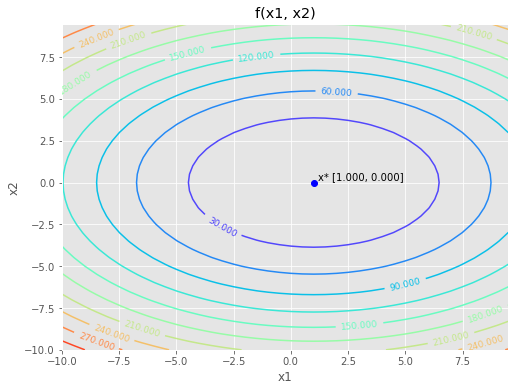

In [12]:
delta = 0.5
x1 = np.arange(-10.0, 10.0, delta)
x2 = np.arange(-10.0, 10.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = f_x1_x2([X1, X2])

fig, ax = plt.subplots(figsize=(8,6))
CS = ax.contour(X1, X2, Z, 10, cmap=plt.get_cmap('rainbow'))
ax.clabel(CS, inline=1, fontsize=9)
ax.set_xlabel('x1')
ax.set_ylabel('x2')


plt.plot(x[0], x[1], marker='o', color='blue')
x_texto = "x* [{x1:.3f}, {x2:.3f}]"
plt.annotate(x_texto.format(x1 = x[0], x2 = x[1]), x + np.array([0.2, 0.2]))

ax.set_title('f(x1, x2)')

## Referências

- **Numpy**
  - [User guide](https://docs.scipy.org/doc/numpy/user/index.html)
  - [Cheat-sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
  - [Numpy notebook](https://colab.research.google.com/drive/1qwJFeJBOQNHctsmWE0uNpkjhEvXYSqnd)

- **Matplotlib**
  - [User guide](https://matplotlib.org/users/index.html)
  - [Cheat-sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
  
- **Pandas**
  - [Tutorials and references](https://pandas.pydata.org/pandas-docs/version/0.22.0/tutorials.html)
  - [Cheat-sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf)
  - [Pandas notebook](https://colab.research.google.com/drive/1SR2lz4pC5uZeQzg_RNYNaTVa6L0-esha)